In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_science_job.csv")

In [3]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
# Finding cols where missing values is less than 5% for applying CCA


cca_col =[]
for col in df.columns:
    if 0 < df[col].isnull().mean()*100 < 5:
        cca_col.append(col)
        

In [5]:
# above code using List Comprehension

cols =[col for col in df.columns if 0 < df[col].isnull().mean()*100 < 5 ]

In [6]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
len(df[cols].dropna())/len(df)  #Finding what % of rows are left after dropping the above cols

0.8968577095730244

In [8]:
df_new = df[cols].dropna()
df_new.shape,df.shape

((17182, 5), (19158, 13))

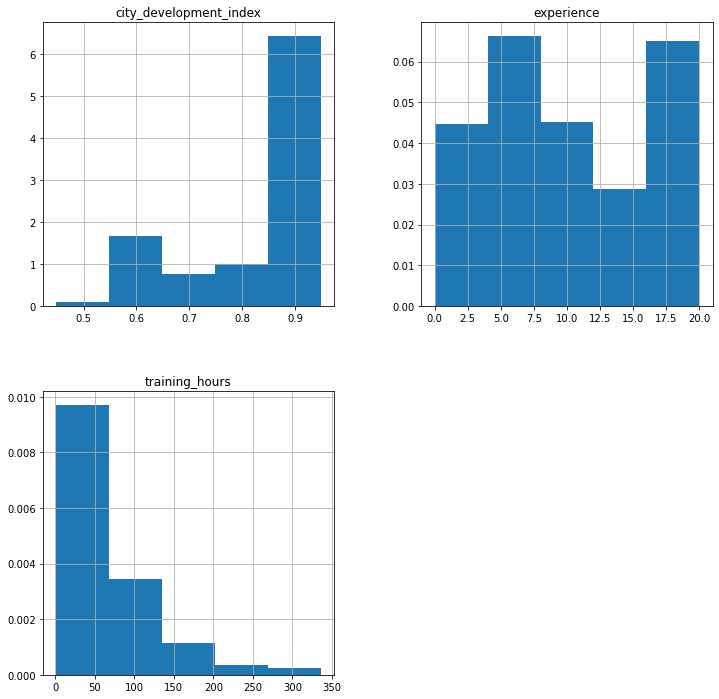

In [9]:
df_new.hist(bins=5, density=True, figsize=(12, 12))
plt.show()

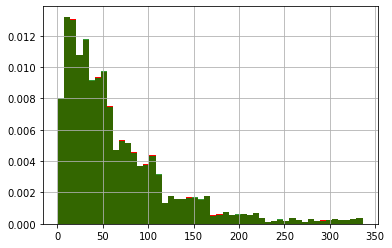

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [18]:
#Function to see comparison before and after dropping missing observation

def hist(feature,df,df_new):
    fig = plt.figure()
    ax = fig.add_subplot(111)

# original data
    df[feature].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
    df_new[feature].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

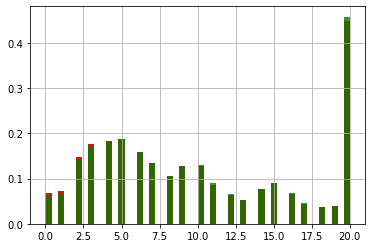

In [21]:
hist('experience',df,df_new)

In [26]:
#Function to see comparison before and after dropping missing observation
def pdf(feature,df,df_new):
    fig = plt.figure()
    ax = fig.add_subplot(111)

# original data
    df[feature].plot.density(color='red')

# data after cca
    df_new[feature].plot.density(color='green')

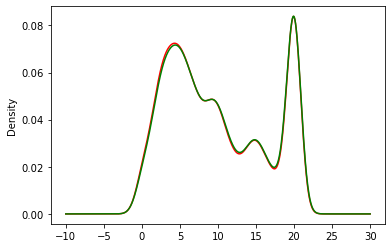

In [27]:
pdf('experience',df,df_new)

In [41]:
temp = pd.concat([
    
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),
    
    
    # percentage of observations per category, cca data
    df_new['enrolled_university'].value_counts()/len(df_new)],
    axis = 1)

#changing the names of the columns
temp.columns = ['original','cca']
temp


,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
